# Iris Flower Classication


This is one of the most famous dataset in data science. The task is to classify the sample into three types iris flower-Iris-setosa, Iris-versicolor, and Iris-virginica based on sepal length, sepal width, petal length, and petal width. This is a classic multi-variable multi-class classification problem.

## Import Libraries

In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/iris/database.sqlite
/kaggle/input/iris/Iris.csv


## Import Dataset

In [142]:
iris = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [78]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [79]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Initial Exploration
Before running any algorithms, let's first try to understand the dataset a bit.

First, let's check out the variables, and see if there's any correlation with each other.

In [20]:
iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


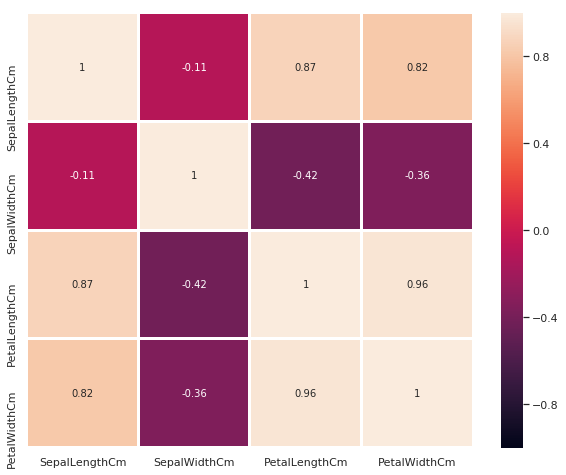

In [50]:
plt.figure(figsize=(10,8))
sns.heatmap(iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].corr(), vmin=-1.0, vmax=1.0, annot=True, linewidths=2)
plt.show()

We can see that there's a really strong positive correlation between petal length and petal width, a strong positive correlation between sepal length and petal length, and a strong positive correlation between sepal length and petal width. If there's a huge dataset with large amount of features, we can run a dimensionality reduction algorithm to take out the redundant features, but because this is such a small dataset, we can keep all the features.

Now let's take a look at the distribution of each variables with respect to each type of Iris.

In [43]:
iris.groupby('Species').describe()

Id                                                        \
                count   mean       std    min     25%    50%     75%    max   
Species                                                                       
Iris-setosa      50.0   25.5  14.57738    1.0   13.25   25.5   37.75   50.0   
Iris-versicolor  50.0   75.5  14.57738   51.0   63.25   75.5   87.75  100.0   
Iris-virginica   50.0  125.5  14.57738  101.0  113.25  125.5  137.75  150.0   

                SepalLengthCm                                              \
                        count   mean       std  min    25%  50%  75%  max   
Species                                                                     
Iris-setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                SepalWidthCm                                                \
                       count   mean       std  min    25%  50%    75%  max   
Species                                                                      
Iris-setosa             50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4   
Iris-versicolor         50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4   
Iris-virginica          50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8   

                PetalLengthCm                                               \
                        count   mean       std  min  25%   50%    75%  max   
Species                                                                      
Iris-setosa              50.0  1.464  0.173511  1.0  1.4  1.50  1.575  1.9   
Iris-versicolor          50.0  4.260  0.469911  3.0  4.0  4.35  4.600  5.1   
Iris-virginica           50.0  5.552  0.551895  4.5  5.1  5.55  5.875  6.9   

                PetalWidthCm                                            
                       count   mean       std  min  25%  50%  75%  max  
Species                                                                 
Iris-setosa             50.0  0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor         50.0  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica          50.0  2.026  0.274650  1.4  1.8  2.0  2.3  2.5

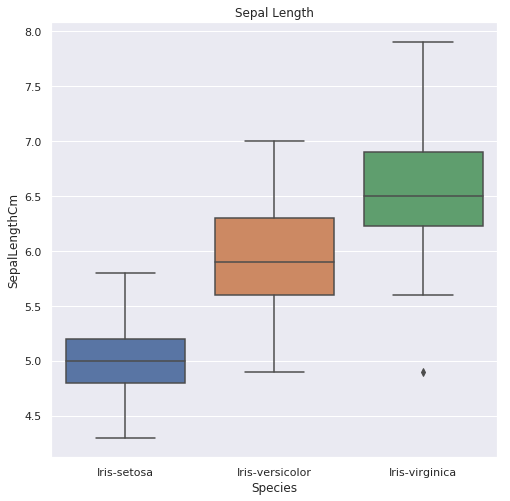

In [73]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="Species", y="SepalLengthCm", data=iris).set_title('Sepal Length')
plt.show()

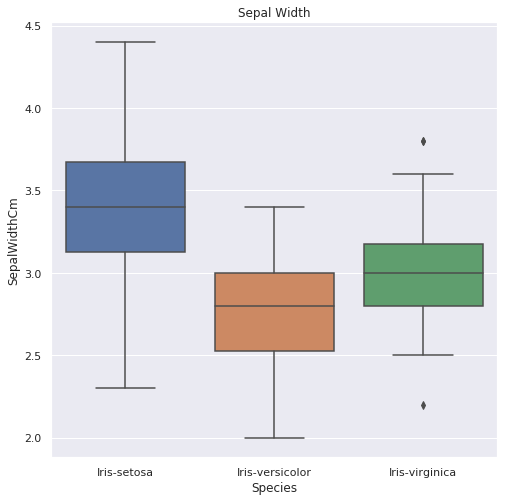

In [74]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="Species", y="SepalWidthCm", data=iris).set_title('Sepal Width')
plt.show()

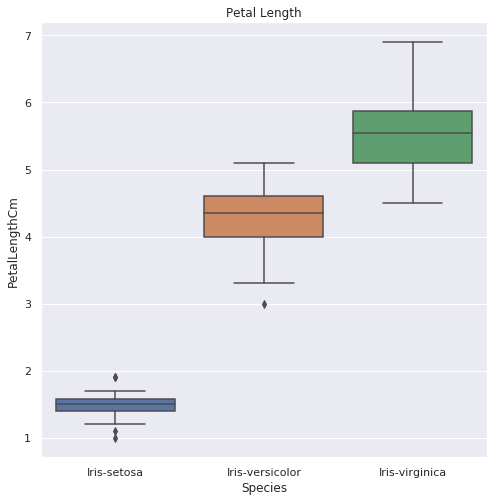

In [77]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris).set_title('Petal Length')
plt.show()

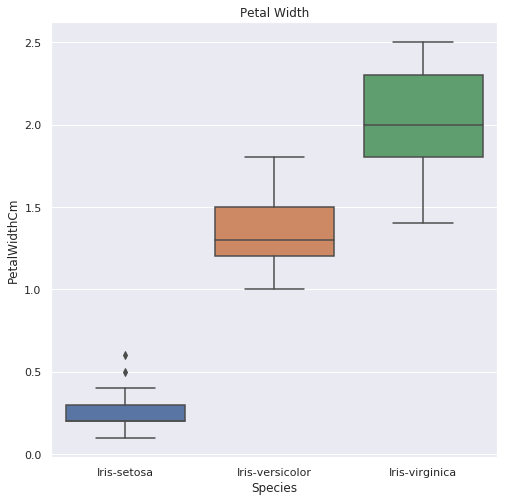

In [76]:
plt.figure(figsize=(8,8))
ax = sns.boxplot(x="Species", y="PetalWidthCm", data=iris).set_title('Petal Width')
plt.show()

From the four graphs above, we can see that there's a large difference in distribution of data especially for sepal length, petal length, petal width, not so much for sepal width. Decision tree seems like a sensible algorithm to model the problem.

## Modeling


We start with separating the dataset into training, validation, and test set.

In [143]:
# We take 80% of data into training, and 20% into test
# For each set, a third belonds to each type of Iris
iris.drop(['Id'], axis=1, inplace=True)
training = pd.concat([iris[:40], iris[50:90], iris[100:140]])
test = pd.concat([iris[40:50], iris[90:100], iris[140:]])
training_X = training[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
training_y = training['Species']
test_X  = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_y = test['Species']

In [144]:
print('Training set:', training_X.shape)
print('Test set:', test_X.shape)

Training set: (120, 4)
Test set: (30, 4)


We will run a couple classification algorithms on the dataset and see how well they work.
* Logistic Regression
* Decision Tree
* K Nearest Neighbor(KNN)
* Support Vector Machine

### Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression
LR_classifier = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=200).fit(training_X, training_y)
print('Training accuracy:', LR_classifier.score(training_X, training_y))
print('Test accuracy:', LR_classifier.score(test_X, test_y))

Training accuracy: 0.975
Test accuracy: 1.0


### Decision Tree

In [174]:
from sklearn.tree import DecisionTreeClassifier
dTree_classifier = DecisionTreeClassifier(criterion="entropy").fit(training_X, training_y)
print('Training accuracy:', dTree_classifier.score(training_X, training_y))
print('Test accuracy:', dTree_classifier.score(test_X, test_y))

Training accuracy: 1.0
Test accuracy: 1.0


### K Nearest Neighbor(KNN)

In [172]:
from sklearn.neighbors import KNeighborsClassifier
KNN_classifier = KNeighborsClassifier().fit(training_X, training_y)
print('Training accuracy:', KNN_classifier.score(training_X, training_y))
print('Test accuracy:', KNN_classifier.score(test_X, test_y))

Training accuracy: 0.9666666666666667
Test accuracy: 1.0


### Support Vector Machine

In [173]:
from sklearn.svm import LinearSVC
SVC_classifier = LinearSVC(multi_class='crammer_singer', max_iter=3000).fit(training_X, training_y)
SVC_classifier.score(training_X, training_y)
print('Training accuracy:', SVC_classifier.score(training_X, training_y))
print('Test accuracy:', SVC_classifier.score(test_X, test_y))

Training accuracy: 0.975
Test accuracy: 1.0


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


All four algorithms performs perfectly on the test set, achieving 100% accuracy. We can now use the algorithms to predict the type of Iris when we have new measurements.

At last, let's visualize the decision tree.

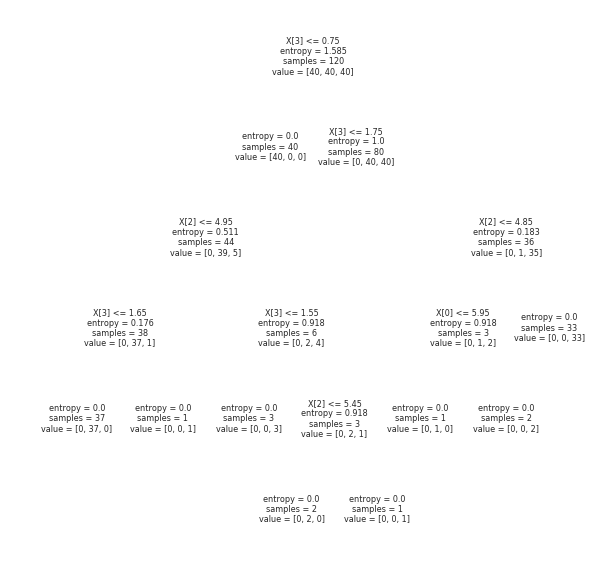

In [180]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10))
plot_tree(dTree_classifier)
plt.show()